## Convolution Operation

Explanation for the Convolutional layer and Operation Obtained mainly from [here](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381) 

Convolutional Operation means for a given input we re-estimate it as the weighted average of all the inputs around it. We have some weights assigned to the neighbor values and we take the weighted sum of the neighbor values to estimate the value of the current input/pixel.

Now, this matrix of weights is referred to as the Kernel or Filter. In the above case, we have the kernel of size 2X2. with the formula $$ S_{ij}=(I * K)_{ij} = \sum^{m-1}_{a=0}\sum^{n-1}_{b=0}I_{i+a,j+b}K_{a,b} $$  
* m: number of rows(in this case 4) 
* n: number of columns
The operation will go following this way
 
<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*l9ylKJ8M35Qo0KFBAsaRyg.png' height='300' width='600'>

The output of this operation would be: $ (aw + bx + ey + fz) $ 

<img src='https://miro.medium.com/v2/resize:fit:360/format:webp/1*fIkg-2xdlTj1kmRN90q5uQ.png' height='100' width='200'> which applied to the other segments will become this -> <img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*B9zc49InxP2sf5vYxdSUgw.png' height='100' width='600'>

Then we move the filter horizontally by one and place it over the next 2 X 2 portion of the input; in this case pixels of interest would be b, c, f, g and we compute the output using the same technique and we would get:

[Original Code](https://github.com/SamratSahoo/UT-Arlington-Research/blob/master/Week%206%20-%20Convolutions%20%26%20Wavelet%20Transforms/Convolutions.py)

In [52]:
def convolve2D(image, kernel, padding=1, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

# Grayscale Image
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

## Filters

Based on the kernel, filter, applied we will be applying a different kernel we will obtained a different effect. For Example, taking as example the edge detection filter 

$ \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 &  -1 & -1 \end{bmatrix} $ we will obtain the effect of choising only the element in the center and disgarding the elements in the edges, thus focalizing only the elements in the center

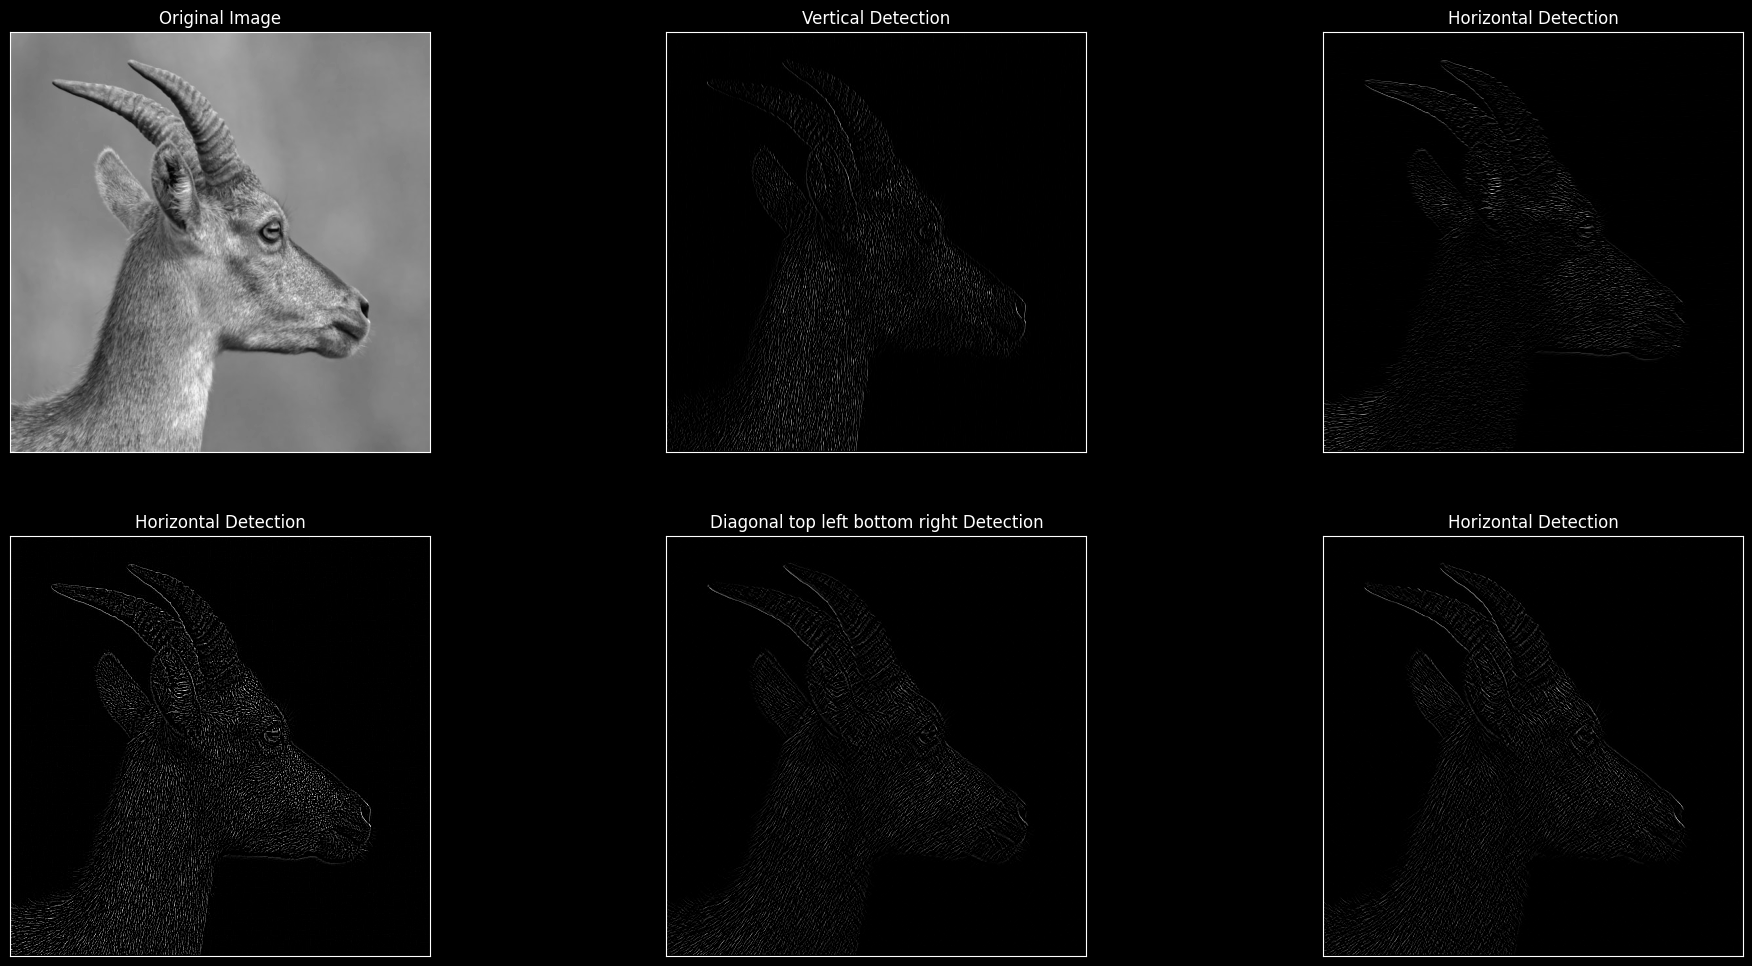

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('capri.jpg')

    # Edge Detection Kernel
    kernel_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    # Vertical Detectiin Kernel
    kernel_vertical = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
    # Horizontal Detectioin Kernel
    kernel_horizontal = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
    # Diagonal top left bottom rightDetectioin Kernel
    kernel_diag_l = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
    # Diagonal bottom left top right Detectioin Kernel
    kernel_diag_r = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])
    

    # Convolve and Save Output
    output_1 = convolve2D(image, kernel_edge, padding=1, strides=1)
    output_2 = convolve2D(image, kernel_vertical, padding=1, strides=1)
    output_3 = convolve2D(image, kernel_horizontal, padding=1, strides=1)
    output_4 = convolve2D(image, kernel_diag_r, padding=1, strides=1)
    output_5 = convolve2D(image, kernel_diag_l, padding=1, strides=1)
    #output_1 = cv2.imread(output_1)

    # cv2.imwrite('2DConvolved.jpg', output)
     # https://stackoverflow.com/questions/66997469/both-0-and-255-give-black-image-for-gray-color-map-why-is-that
     # To get your expected black/white output, you need to set vmin and vmax manually. 
     # Otherwise pyplot.imshow() infers the min/max from the data.
     # Note that without setting these, any constant value would produce a black image, not just 0 and 255.
    plt.figure(figsize=([20,8]))
    plt.subplot(231),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(output_2, cmap='gray', vmin=0, vmax=255)
    plt.title('Vertical Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(output_3, cmap='gray', vmin=0, vmax=255)
    plt.title('Horizontal Detection'), plt.xticks([]), plt.yticks([])   
    plt.subplot(234),plt.imshow(output_1, cmap='gray', vmin=0, vmax=255)
    plt.title('Edge Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(235),plt.imshow(output_4, cmap='gray', vmin=0, vmax=255)
    plt.title('Diagonal top left bottom right Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(236),plt.imshow(output_5, cmap='gray', vmin=0, vmax=255)
    plt.title('Horizontal Detection'), plt.xticks([]), plt.yticks([])   
    plt.show()


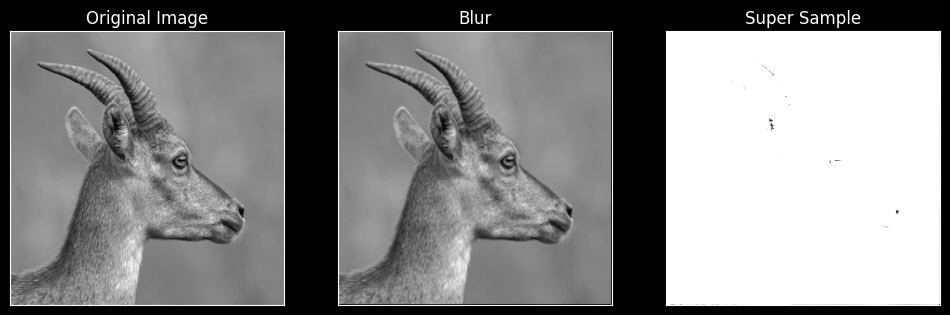

In [63]:
# Blur Kernel
blur = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
# Vertical Detectiin Kernel
super_sample = np.array([[1.2, 1.2, 1.2], [1.2, 1.2, 1.2], [1.2, 1.22, 1.2]])

# Convolve and Save Output
output_1 = convolve2D(image, blur, padding=1, strides=1)
output_2 = convolve2D(image, super_sample, padding=1, strides=1)

plt.figure(figsize=([12,12]))
plt.subplot(131),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_1, cmap='gray', vmin=0, vmax=255)
plt.title('Blur'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_2, cmap='gray', vmin=0, vmax=255)
plt.title('Super Sample'), plt.xticks([]), plt.yticks([])   
plt.show()
